In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import defaultdict
from scipy.spatial.distance import cdist
mpl.rcParams['axes.linewidth'] = 2
from DEPENDENCIES.recycle import *
from svg2emf import svg2emf

# PMF profiles

In [2]:
def homogenize_profiles(raw_data, nice_x=np.linspace(0,5,200)):
    clean_pmf = np.zeros((len(nice_x), len(raw_data)))
    clean_std = np.zeros_like(clean_pmf)
    for i, x in enumerate(nice_x):
        for p, prof in enumerate(raw_data):
            close_ndx = np.argsort(np.abs(prof[:,0]-x))[:2]
            clean_pmf[i,p] = np.mean(prof[close_ndx,1])
            clean_std[i,p] = np.mean(prof[close_ndx,2])
    clean_pmf = clean_pmf - clean_pmf[-1,:]
    
    fitted_pmf = np.zeros_like(clean_pmf)
    fitted_std = np.zeros_like(clean_std)
    for p, (pmf, std) in enumerate(zip(clean_pmf.T, clean_std.T)):
        pol = np.poly1d(np.polyfit(nice_x, pmf, deg=14))
        fitted_pmf[:,p] = pol(nice_x)
        pol_std = np.poly1d(np.polyfit(nice_x, std, deg=14))
        fitted_std[:,p] = pol_std(nice_x)
    fitted_pmf = fitted_pmf - fitted_pmf[-1,:]
    return fitted_pmf, fitted_std

In [3]:
map_rep = {0:'',1:"-r1",2:"-r2",3:"-r3",4:"-r4"}
map_color = {'gH':(0.2,0.8,0.2), 'NP0':(0.5,0.5,0.5), 'gHNP':(0.9,0.6,0.0), 'CitNP':(0.0,0.4,1.0)}
map_color = {'gH':(0.2,0.8,0.2), 'Pristine':(0.5,0.5,0.5), 'gHNP':(0.9,0.6,0.0), 'CitNP':(0.0,0.4,1.0)}

In [4]:
g5_raw = [read_text_file("PMFs/gH-POPC5-46{}_PMF_std.xvg".format(map_rep[i])) for i in range(3)]
g6_raw = [read_text_file("PMFs/gH-POPC6-46{}_PMF_std.xvg".format(map_rep[i])) for i in range(3)]
n05_raw = [read_text_file("PMFs/NP610-POPC5-46{}_PMF_std.xvg".format(map_rep[i])) for i in range(1)]
n06_raw = [read_text_file("PMFs/NP610-POPC6-46{}_PMF_std.xvg".format(map_rep[i])) for i in range(1)]
n15_raw = [read_text_file("PMFs/NP61-POPC5-46{}_PMF_std.xvg".format(map_rep[i])) for i in range(5)]
n16_raw = [read_text_file("PMFs/NP61-POPC6-46{}_PMF_std.xvg".format(map_rep[i])) for i in range(5)]
nc5_raw = [read_text_file("PMFs/NP610c-POPC5-46{}_PMF_std.sfu".format(map_rep[i])) for i in range(1)]
nc6_raw = [read_text_file("PMFs/NP610c-POPC6-46{}_PMF_std.xvg".format(map_rep[i])) for i in range(1)]

In [5]:
x = np.linspace(0,5,200)
g5 = homogenize_profiles(g5_raw, nice_x=x)
g6 = homogenize_profiles(g6_raw, nice_x=x)
n05 = homogenize_profiles(n05_raw, nice_x=x)
n06 = homogenize_profiles(n06_raw, nice_x=x)
n15 = homogenize_profiles(n15_raw, nice_x=x)
n16 = homogenize_profiles(n16_raw, nice_x=x)
nc5 = homogenize_profiles(nc5_raw, nice_x=x)
nc6 = homogenize_profiles(nc6_raw, nice_x=x)

In [6]:
dists = []
dgs = []
for prof in n15[0].T:
    ndx_min = np.argmin(prof)
    d, dg = x[ndx_min], prof[ndx_min]
    dists.append(d)
    dgs.append(dg)
    print("{:.3f} nm --> {:.3f} kcal/mol".format(d, dg))
print("Dist: {:.3f} +/- {:.3f} nm".format(np.mean(dists), np.std(dists)))
print("DelG: {:.3f} +/- {:.3f} kcal/mol".format(np.mean(dgs), np.std(dists)))

1.432 nm --> -107.680 kcal/mol
1.508 nm --> -110.906 kcal/mol
1.407 nm --> -115.979 kcal/mol
1.432 nm --> -103.007 kcal/mol
1.482 nm --> -91.013 kcal/mol
Dist: 1.452 +/- 0.037 nm
DelG: -105.717 +/- 0.037 kcal/mol


In [7]:
dists = []
dgs = []
mask = np.logical_and(x<2.5, x>1)
for prof in n16[0][mask,:].T:
    ndx_min = np.argmin(prof)
    d, dg = x[mask][ndx_min], prof[ndx_min]
    dists.append(d)
    dgs.append(dg)
    print("{:.3f} nm --> {:.3f} kcal/mol".format(d, dg))
print("Dist: {:.3f} +/- {:.3f} nm".format(np.mean(dists), np.std(dists)))
print("DelG: {:.3f} +/- {:.3f} kcal/mol".format(np.mean(dgs), np.std(dists)))

1.683 nm --> -110.978 kcal/mol
1.583 nm --> -140.095 kcal/mol
1.859 nm --> -50.408 kcal/mol
1.759 nm --> -101.195 kcal/mol
1.633 nm --> -90.422 kcal/mol
Dist: 1.704 +/- 0.097 nm
DelG: -98.620 +/- 0.097 kcal/mol


No cholesterol
gH 1.7336683417085428 -22.34569228489434 0.9067385502784184
NP0 0.05025125628140704 -187.13066118033308 0.0


KeyError: 'NP0'

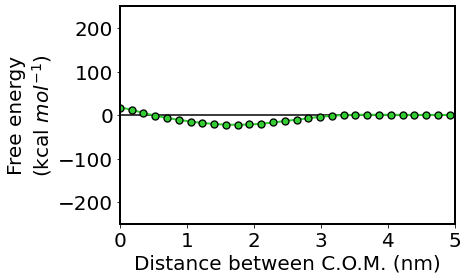

In [8]:
no_chol = [g5, n05, n15, nc5]
no_chol_labs = ['gH', 'NP0', 'gHNP', 'CitNP']
print("No cholesterol")
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
ax.set_xlim(0,5)
ax.set_ylim(-250,250)
ax.tick_params(labelsize=Z)
ax.set_xlabel("Distance between C.O.M. (nm)", fontsize=Z)
ax.set_ylabel("Free energy\n"+r"(kcal $mol^{-1}$)", fontsize=Z)
ax.axhline(0, lw=1.5, c='k')
for sys, lab in zip(no_chol, no_chol_labs):
    dg_mean, dg_std = np.mean(sys[0], axis=1), np.std(sys[0], axis=1)
    print(lab, x[np.argmin(dg_mean)], np.min(dg_mean), dg_std[np.argmin(dg_mean)])
    ax.errorbar(x, dg_mean, yerr=dg_std, mew=1.3, markevery=7, errorevery=7, fmt='o-', ms=7, lw=2, mec='k', color=map_color[lab], label=lab, capsize=2.5)
ax.legend(fontsize=Z-4)
plt.show()
plt.close()

Cholesterol
gH 2.0100502512562817 -23.526353705786253 0.6053300740764982
Pristine 0.0 -228.10288539858803 0.0
gHNP 1.7587939698492463 -98.22765340562658 29.48338992264609


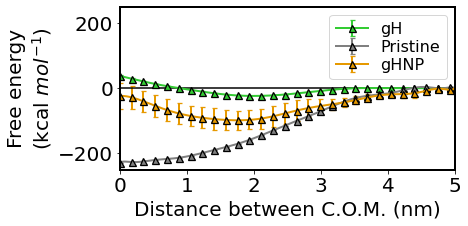

In [21]:
chol = [g6, n06, n16]#, nc6]
#chol_labs = ['gH', 'NP0', 'gHNP']#, 'CitNP']
chol_labs = ['gH', 'Pristine', 'gHNP']
print("Cholesterol")
fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax.tick_params(labelsize=Z)
ax.set_xlim(0,5)
ax.set_ylim(-250,250)
ax.set_xlabel("Distance between C.O.M. (nm)", fontsize=Z)
ax.set_ylabel("Free energy\n"+r"(kcal $mol^{-1}$)", fontsize=Z)
ax.axhline(0, lw=1.5, c='k')
for sys, lab in zip(chol, chol_labs):
    dg_mean, dg_std = np.mean(sys[0], axis=1), np.std(sys[0], axis=1)
    print(lab, x[np.argmin(dg_mean)], np.min(dg_mean), dg_std[np.argmin(dg_mean)])
    ax.errorbar(x, dg_mean, yerr=dg_std, mew=1.3, markevery=7, errorevery=7, fmt='^-', ms=7, lw=2, mec='k', color=map_color[lab], label=lab, capsize=2.5)
ax.legend(fontsize=Z-4, loc='upper right', labelspacing=0.2)
plt.savefig("Plots/PMF_chol.png", format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

gHNP
POPC 1.4572864321608041 -105.66739544043898 8.452361763320424
POPC:CHOL 1.7587939698492463 -98.22765340562658 29.48338992264609


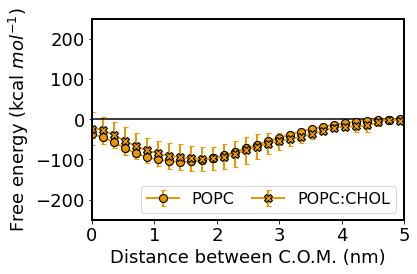

In [29]:
Z=18
n1 = [n15, n16]
n1_labs = ['POPC', 'POPC:CHOL']
fmts = ['-o', '-X']
print("gHNP")
fig = plt.figure(figsize=(5.6,3.7))
ax = plt.axes()
ax.set_xlim(0,5)
ax.set_ylim(-250,250)
ax.tick_params(labelsize=Z)
ax.set_xlabel("Distance between C.O.M. (nm)", fontsize=Z)
ax.set_ylabel("Free energy "+r"(kcal $mol^{-1}$)", fontsize=Z)
ax.axhline(0, lw=1.5, c='k')
for sys, lab, fmt in zip(n1, n1_labs, fmts):
    dg_mean, dg_std = np.mean(sys[0], axis=1), np.std(sys[0], axis=1)
    print(lab, x[np.argmin(dg_mean)], np.min(dg_mean), dg_std[np.argmin(dg_mean)])
    ax.errorbar(x, dg_mean, yerr=dg_std, mew=1.1, markevery=7, errorevery=7, fmt=fmt, ms=8, lw=2, mec='k', color=map_color['gHNP'], label=lab, capsize=2.5)
ax.legend(fontsize=Z-2, loc='upper right', ncol=2, mode='expand', bbox_to_anchor=(0.13,0.11,0.87,0.1))
plt.savefig("Plots/gHNP-PMF.png", format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

NP61 only


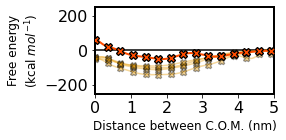

In [32]:
print("NP61 only")
fig = plt.figure(figsize=(3.2,1.6))
ax = plt.axes()
ax.tick_params(labelsize=Z-2)
ax.set_xlim(0,5)
ax.set_xticks([0,1,2,3,4,5])
ax.set_ylim(-250,250)
ax.set_yticks([-200,0,200])
ax.set_xlabel("Distance between C.O.M. (nm)", fontsize=Z-6)
ax.set_ylabel("Free energy\n"+r"(kcal $mol^{-1}$)", fontsize=Z-6)
ax.axhline(0, lw=1.5, c='k')
for pmf in n16[0].T:
    if pmf[0]<0:
        ax.errorbar(x, pmf, mew=1.3, markevery=14, errorevery=7, fmt='X-', ms=6, lw=1.5, mec='k', color=map_color['gHNP'], capsize=2.5, alpha=0.4)
    else:
        ax.errorbar(x, pmf, mew=1.3, markevery=14, errorevery=7, fmt='X-', ms=8, lw=2, mec='k', color=(1.0,0.3,0.0), capsize=2.5, zorder=20)
plt.savefig("Plots/gHNP-PMF-rep.png", format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()
plt.close()

gH
POPC 1.7336683417085428 -22.34569228489434 0.9067385502784184
POPC:CHOL 2.0100502512562817 -23.526353705786253 0.6053300740764982


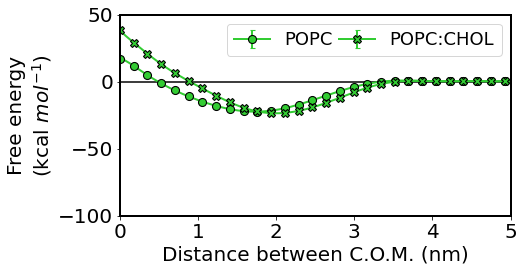

In [17]:
gH = [g5, g6]
gH_labs = ['POPC', 'POPC:CHOL']
fmts = ['-o', '-X']
print("gH")
fig = plt.figure(figsize=(7,3.7))
ax = plt.axes()
ax.set_xlim(0,5)
ax.set_ylim(-100,50)
ax.tick_params(labelsize=Z)
ax.set_xlabel("Distance between C.O.M. (nm)", fontsize=Z)
ax.set_ylabel("Free energy\n"+r"(kcal $mol^{-1}$)", fontsize=Z)
ax.axhline(0, lw=1.5, c='k')
for sys, lab, fmt in zip(gH, gH_labs, fmts):
    dg_mean, dg_std = np.mean(sys[0], axis=1), np.std(sys[0], axis=1)
    print(lab, x[np.argmin(dg_mean)], np.min(dg_mean), dg_std[np.argmin(dg_mean)])
    ax.errorbar(x, dg_mean, yerr=dg_std, mew=1.1, markevery=7, errorevery=7, fmt=fmt, ms=8, lw=2, mec='k', color=map_color['gH'], label=lab, capsize=2.5)
ax.legend(fontsize=Z-2, loc='upper right', ncol=2, mode='expand', bbox_to_anchor=(0.25,0.9,0.75,0.1))
plt.savefig("Plots/gH-PMF.png", format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()

NP0/CitNP
POPC 0.05025125628140704 -187.13066118033308 0.0
POPC:CHOL 0.0 -228.10288539858803 0.0
POPC 4.447236180904523 -4.7036888439487825 0.0
POPC:CHOL 5.0 0.0 0.0


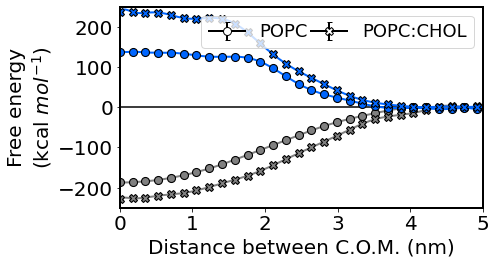

In [13]:
n0 = [n05, n06]
n0_labs = ['POPC', 'POPC:CHOL']
nc = [nc5, nc6]
nc_labs = ['POPC', 'POPC:CHOL']
fmts = ['-o', '-X']
print("NP0/CitNP")
fig = plt.figure(figsize=(6.5,3.7))
ax = plt.axes()
ax.set_xlim(0,5)
ax.set_ylim(-250,250)
ax.tick_params(labelsize=Z)
ax.set_xlabel("Distance between C.O.M. (nm)", fontsize=Z)
ax.set_ylabel("Free energy\n"+r"(kcal $mol^{-1}$)", fontsize=Z)
ax.axhline(0, lw=1.5, c='k')
for sys, lab, fmt in zip(n0, n0_labs, fmts):
    dg_mean, dg_std = np.mean(sys[0], axis=1), np.std(sys[0], axis=1)
    print(lab, x[np.argmin(dg_mean)], np.min(dg_mean), dg_std[np.argmin(dg_mean)])
    ax.errorbar(x, dg_mean, yerr=dg_std, mew=1.1, markevery=7, errorevery=7, fmt=fmt, ms=8, lw=2, mec='k', color=map_color['NP0'], capsize=2.5)
for sys, lab, fmt in zip(nc, nc_labs, fmts):
    dg_mean, dg_std = np.mean(sys[0], axis=1), np.std(sys[0], axis=1)
    print(lab, x[np.argmin(dg_mean)], np.min(dg_mean), dg_std[np.argmin(dg_mean)])
    ax.errorbar(x, dg_mean, yerr=dg_std, mew=1.1, markevery=7, errorevery=7, fmt=fmt, ms=8, lw=2, mec='k', color=map_color['CitNP'], capsize=2.5)
ax.errorbar([],[], yerr=[], mew=1, markevery=7, errorevery=7, fmt=fmts[0], ms=8, lw=2, mec='k', c='k', markerfacecolor='w', capsize=2.5, label=n0_labs[0])
ax.errorbar([],[], yerr=[], mew=1, markevery=7, errorevery=7, fmt=fmts[1], ms=8, lw=2, mec='k', c='k', markerfacecolor='w', capsize=2.5, label=n0_labs[1])
ax.legend(fontsize=Z-2, loc='upper right', ncol=2, mode='expand', bbox_to_anchor=(0.2,0.9,0.8,0.1))
plt.savefig("Plots/NP0-PMF.png", format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
plt.close()